In [1]:
# Mount Google Drive to Colab
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!pwd
!ls -al
%cd '/content/gdrive/My Drive/NLP/Part2'
!ls -al

/content/gdrive/My Drive/NLP/Part2
total 10748
drwx------ 2 root root    4096 Mar 12 02:39 'D015_推論方法的詞向量_實作加速版 word2vec_作業檔'
drwx------ 2 root root    4096 Mar 12 02:38 'D015_推論方法的詞向量_實作加速版 word2vec_範例檔'
-rw------- 1 root root   14556 Dec 30 08:11  Day01_Colab使用操作.ipynb
-rw------- 1 root root   78808 Feb 22 05:40  Day10_PyTorch模型訓練_作業.ipynb
-rw------- 1 root root   84545 Mar 18 04:33  Day10_PyTorch模型訓練_課程練習.ipynb
-rw------- 1 root root   36209 Mar 18 09:28 'Day19_使用Pytorch 實作_SingleRNN_作業_RNN_MNIST.ipynb'
-rw------- 1 root root   36691 Mar 18 09:36 'Day19_使用Pytorch 實作_SingleRNN_作業_RNN_MNIST_RevB.ipynb'
drwx------ 2 root root    4096 Feb 17 05:25  __MACOSX
drwx------ 2 root root    4096 Mar 18 04:35  mnist_data
-rw------- 1 root root  104951 Feb 22 05:40  model_save.pth
-rw------- 1 root root  479254 Dec 30 08:11  spam_colab_to_drive.csv
-rw------- 1 root root  503663 Dec 30 08:10  spam.csv
drwx------ 2 root root    4096 Feb 17 05:25  spam_data
-rw------- 1 root root 9644922 Feb 17 04:

# 作業: 使用 RNN 實作手寫數字辨識


##[作業目標]

*   使用 Pytorch 的 RNN
*   熟練建構 RNN 網路
*   RNN 也可以用在簡單的影像識別應用，準確度高達 90% 以上

###[動手做]
*   在 ImageRNN 類別裡面完成 RNN 物件 basic_rnn 的建立
*   在 ImageRNN 類別裡面完成 全連結層 FC 物件的建立

##[作業重點]

順利實作出手寫數字辨識的 RNN 模型
*   使用 torchvision 提供的手寫數字資料集
*   架構 ImageRNN 類別




In [4]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [5]:
####import tensorflow as tf
####(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
#DATA_URL = 'https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz'
#
#path = tf.keras.utils.get_file('C:\\Users\\angus.tu\\Downloads\\NLP_tmp\\MNIST_data\\mnist.npz', DATA_URL)
#with np.load(path) as data:
#  train_examples = data['x_train']
#  train_labels = data['y_train']
#  test_examples = data['x_test']
#  test_labels = data['y_test']

#### 下載:
train-images-idx3-ubyte.gz:  training set images (9912422 bytes) 

train-labels-idx1-ubyte.gz:  training set labels (28881 bytes) 

t10k-images-idx3-ubyte.gz:   test set images (1648877 bytes) 

t10k-labels-idx1-ubyte.gz:   test set labels (4542 bytes)

In [18]:
mnist_files = [
'train-images-idx3-ubyte.gz',
'train-labels-idx1-ubyte.gz',
't10k-images-idx3-ubyte.gz',
't10k-labels-idx1-ubyte.gz'
]
#path = 'C:\\Users\\angus.tu\\Downloads\\NLP_tmp\\MNIST_data\\'
path = '.\\mnist_data\\'
for file in mnist_files:
    url = 'https://ossci-datasets.s3.amazonaws.com/mnist/' + file
    print(url)
    tf.keras.utils.get_file(path + file, url)

https://ossci-datasets.s3.amazonaws.com/mnist/train-images-idx3-ubyte.gz
https://ossci-datasets.s3.amazonaws.com/mnist/train-labels-idx1-ubyte.gz
https://ossci-datasets.s3.amazonaws.com/mnist/t10k-images-idx3-ubyte.gz
https://ossci-datasets.s3.amazonaws.com/mnist/t10k-labels-idx1-ubyte.gz


In [21]:
#path = '.\\mnist_data\\'
!ls -al ./mnist_data
!pwd

total 53664
-rw------- 1 root root  7840016 Jan 26  1998 t10k-images.idx3-ubyte
-rw------- 1 root root    10008 Jan 26  1998 t10k-labels.idx1-ubyte
-rw------- 1 root root 47040016 Nov 18  1996 train-images.idx3-ubyte
-rw------- 1 root root    60008 Nov 18  1996 train-labels.idx1-ubyte
/content/gdrive/My Drive/NLP/Part2


In [24]:
from mlxtend.data import loadlocal_mnist
import platform

path = "content/gdrive/My Drive/NLP/Part2/mnist_data/"
print(platform.system())
if not platform.system() == 'Windows':
    X, y = loadlocal_mnist(
            images_path= "/content/gdrive/My Drive/NLP/Part2/mnist_data/train-images.idx3-ubyte", 
            labels_path= "/content/gdrive/My Drive/NLP/Part2/mnist_data/train-labels.idx1-ubyte"
            )

else:
    X, y = loadlocal_mnist(
            images_path= "/content/gdrive/My Drive/NLP/Part2/mnist_data/train-images.idx3-ubyte", 
            labels_path= "/content/gdrive/My Drive/NLP/Part2/mnist_data/train-labels.idx1-ubyte"
            )
print('Dimensions: %s x %s' % (X.shape[0], X.shape[1]))
print('\n1st row', X[0])

Linux
Dimensions: 60000 x 784

1st row [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253

### 載入會使用到的套件

In [25]:
import torch
from torch import nn
import torchvision.utils as utils
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np


### 定義超參數

In [26]:

# 超參數 Hyper Parameters
EPOCH = 1               # train the training data n times, to save time, we just train 1 epoch
BATCH_SIZE = 64
TIME_STEP = 28          # rnn time step / image height
INPUT_SIZE = 28         # rnn input size / image width
LR = 0.01               # learning rate
DOWNLOAD_MNIST = True   # set to True if haven't download the data


### 載入訓練資料
建立 train_loader 物件用來載入訓練資料


In [27]:
# 載入手寫數字資料集 Mnist digital dataset
train_data = dsets.MNIST(
    root='./mnist_data/',
    train=True,                         # this is training data
    transform=transforms.ToTensor(),    # Converts a PIL.Image or numpy.ndarray to
                                        # torch.FloatTensor of shape (C x H x W) and normalize in the range [0.0, 1.0]
    download=DOWNLOAD_MNIST,            # download it if you don't have it
)

# plot one example
print(train_data.train_data.size())     # (60000, 28, 28)
print(train_data.train_labels.size())   # (60000)

train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)


Extracting ./mnist_data/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist_data/MNIST/raw



Extracting ./mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist_data/MNIST/raw



Extracting ./mnist_data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist_data/MNIST/raw



Extracting ./mnist_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist_data/MNIST/raw
Processing...


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:479: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!
torch.Size([60000, 28, 28])
torch.Size([60000])


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


### 載入測試資料
建立 test_loader 物件用來載入訓練資料

In [33]:
# convert test data into Variable, pick 2000 samples to speed up testing
test_data = dsets.MNIST(
        root='./mnist_data/', 
        train=False, 
        transform=transforms.ToTensor()
        )
test_x = test_data.test_data.type(torch.FloatTensor)[:2000]/255.   # shape (2000, 28, 28) value in range(0,1)
test_y = test_data.test_labels.numpy()[:2000]    # covert to numpy array

test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=True)

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:63: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:53: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


### 把資料顯示出來看看

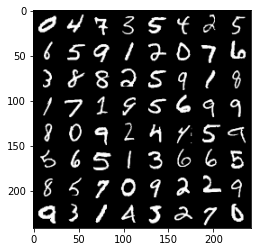

In [34]:
import numpy as np
# Exploring the dataset

# functions to show an image
def imshow(img):
    #img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(utils.make_grid(images))

### 根據資料集的特性，定義資料參數

In [40]:
# parameters 
N_STEPS = 28
N_INPUTS = 28
N_NEURONS = 150
N_OUTPUTS = 10
N_EPHOCS = 20

### 架構 RNN 網路

In [41]:
class ImageRNN(nn.Module):
    def __init__(self, batch_size, n_steps, n_inputs, n_neurons, n_outputs):
        super(ImageRNN, self).__init__()
        
        self.n_neurons = n_neurons
        self.batch_size = batch_size
        self.n_steps = n_steps
        self.n_inputs = n_inputs
        self.n_outputs = n_outputs
        
        # 作業: 請查看 pytorch 文件，選用最基本的 RNN 來當作模型
        self.basic_rnn = nn.RNN(n_inputs, n_neurons)
        
        # 作業: 定義一個全連結層
        self.FC = nn.Linear(n_neurons, n_outputs)
        
    def init_hidden(self,):
        # (num_layers, batch_size, n_neurons)
        return (torch.zeros(1, self.batch_size, self.n_neurons))
        
    def forward(self, X):
        # transforms X to dimensions: n_steps X batch_size X n_inputs
        X = X.permute(1, 0, 2) 
        
        self.batch_size = X.size(1)
        self.hidden = self.init_hidden()

        lstm_out, self.hidden = self.basic_rnn(X, self.hidden)      
        out = self.FC(self.hidden)
        
        return out.view(-1, self.n_outputs) # batch_size X n_output

### 實作訓練程式

In [42]:
import torch.optim as optim

# use gpu if cuda is available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Model instance
model = ImageRNN(BATCH_SIZE, N_STEPS, N_INPUTS, N_NEURONS, N_OUTPUTS)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def get_accuracy(logit, target, batch_size):
    ''' Obtain accuracy for training round '''
    corrects = (torch.max(logit, 1)[1].view(target.size()).data == target.data).sum()
    accuracy = 100.0 * corrects/batch_size
    return accuracy.item()

for epoch in range(N_EPHOCS):  # loop over the dataset multiple times
    train_running_loss = 0.0
    train_acc = 0.0
    model.train()
    
    # TRAINING ROUND
    for i, data in enumerate(train_loader):
         # zero the parameter gradients
        optimizer.zero_grad()
        
        # reset hidden states
        model.hidden = model.init_hidden() 
        
        # get the inputs
        inputs, labels = data
        inputs = inputs.view(-1, 28,28) 

        # forward + backward + optimize
        outputs = model(inputs)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_running_loss += loss.detach().item()
        train_acc += get_accuracy(outputs, labels, BATCH_SIZE)
         
    model.eval()
    print('Epoch:  %d | Loss: %.4f | Train Accuracy: %.2f' 
          %(epoch, train_running_loss / i, train_acc/i))

Epoch:  0 | Loss: 0.6936 | Train Accuracy: 77.26
Epoch:  1 | Loss: 0.3089 | Train Accuracy: 91.10
Epoch:  2 | Loss: 0.2153 | Train Accuracy: 93.91
Epoch:  3 | Loss: 0.1890 | Train Accuracy: 94.57
Epoch:  4 | Loss: 0.1689 | Train Accuracy: 95.30
Epoch:  5 | Loss: 0.1474 | Train Accuracy: 95.82
Epoch:  6 | Loss: 0.1348 | Train Accuracy: 96.26
Epoch:  7 | Loss: 0.1282 | Train Accuracy: 96.44
Epoch:  8 | Loss: 0.1239 | Train Accuracy: 96.44
Epoch:  9 | Loss: 0.1137 | Train Accuracy: 96.80
Epoch:  10 | Loss: 0.1111 | Train Accuracy: 96.89
Epoch:  11 | Loss: 0.1067 | Train Accuracy: 96.99
Epoch:  12 | Loss: 0.1007 | Train Accuracy: 97.17
Epoch:  13 | Loss: 0.0968 | Train Accuracy: 97.34
Epoch:  14 | Loss: 0.0952 | Train Accuracy: 97.30
Epoch:  15 | Loss: 0.0934 | Train Accuracy: 97.39
Epoch:  16 | Loss: 0.0903 | Train Accuracy: 97.45
Epoch:  17 | Loss: 0.0900 | Train Accuracy: 97.45
Epoch:  18 | Loss: 0.0875 | Train Accuracy: 97.60
Epoch:  19 | Loss: 0.0860 | Train Accuracy: 97.62


### 實作測試程式

In [43]:
# Calculate test accuracy
test_acc = 0.0
for i, data in enumerate(test_loader, 0):
    inputs, labels = data
    inputs = inputs.view(-1, 28, 28)

    outputs = model(inputs)

    test_acc += get_accuracy(outputs, labels, BATCH_SIZE)
        
print('Test Accuracy: %.2f'%( test_acc/i))

Test Accuracy: 96.60
